In [73]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter
from IPython.display import display_html
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set(style="whitegrid")

# supervised learning models
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# deep neutral network

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# text manipulation tools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF
import spacy
from wordcloud import WordCloud

ImportError: Traceback (most recent call last):
  File "C:\Users\James\Anaconda3\envs\JamesEnv\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\James\Anaconda3\envs\JamesEnv\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\James\Anaconda3\envs\JamesEnv\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\James\Anaconda3\envs\JamesEnv\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\James\Anaconda3\envs\JamesEnv\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

# Load and Clean Dataset

In [2]:
path = "C:\\Users\\James\\Desktop\\Data_Folder\\yelp\\"

biz=pd.read_csv(path + "yelp_business.csv")
reviews=pd.read_csv(path + "yelp_review.csv")

In [3]:
#biz_attributes=pd.read_csv(path + "yelp_biz_attributes.csv")
#biz_hours=pd.read_csv(path + "yelp_biz_hours.csv")
#check_in=pd.read_csv(path + "yelp_checkin.csv")
#tip=pd.read_csv(path + "yelp_tip.csv")
#user=pd.read_csv(path + "yelp_user.csv")

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [5]:
biz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   174567 non-null  object 
 1   name          174567 non-null  object 
 2   neighborhood  68015 non-null   object 
 3   address       174567 non-null  object 
 4   city          174566 non-null  object 
 5   state         174566 non-null  object 
 6   postal_code   173944 non-null  object 
 7   latitude      174566 non-null  float64
 8   longitude     174566 non-null  float64
 9   stars         174567 non-null  float64
 10  review_count  174567 non-null  int64  
 11  is_open       174567 non-null  int64  
 12  categories    174567 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 17.3+ MB


In [33]:
# load dataset
biz=pd.read_csv(path + "yelp_business.csv")

# remove unnecessary columns; note that stars is total stars for biz
col = ['neighborhood', 'address', 'latitude', 'longitude', 'stars']
biz.drop(columns=col, inplace=True)       

# update categories so that it's a list and not a string
biz.categories = biz.categories.apply(lambda x: x.split(";"))

# we will filter open restaurants in Phoenix, AZ only
biz = biz[
    (biz.city == 'Cleveland') & 
    (biz.state == 'OH') & 
    (biz.is_open == 1) & 
    (biz.categories.apply(
        lambda x: True if 'Restaurants' in x else False
    ))]

In [34]:
df = pd.merge(reviews, biz, how='inner', on='business_id')
df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,city,state,postal_code,review_count,is_open,categories
0,OPZsR2jCG72uoDNjU71DQQ,qYbWTWH5leltA0bzWAOnmA,meXjqyhTNLFmknY39y2sMg,5,2014-09-11,Solid beers -- Christmas Ale defines my holida...,1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
1,fxGwEiSYDtAen8BNuVGGxg,8Az_JgEpXqAii_5EDkw2tw,meXjqyhTNLFmknY39y2sMg,3,2013-10-13,Meh. It was OK. A bartender the night before...,0,1,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
2,Gweb4pADeQ26WnaiKEZ7GQ,T9tEic49JZjN4nCUcDvrRQ,meXjqyhTNLFmknY39y2sMg,4,2014-01-15,"Oh Christmas Ale, oh Christmas Ale, how lovely...",1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
3,P1vhwPI56SeZEz10ywaS7w,W1p8_CFW5FISSihmQo5Qzw,meXjqyhTNLFmknY39y2sMg,3,2012-02-09,What is the big deal about this place? The foo...,2,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."
4,1kQvQlBX0V5_rGddBh9-rQ,Y_PP05RRdzbKRYfDCCfh8w,meXjqyhTNLFmknY39y2sMg,5,2017-04-30,Great Lakes Brewing Company is one of my favor...,0,0,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv..."


In [35]:
# still have a lot of rows and no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56910 entries, 0 to 56909
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     56910 non-null  object
 1   user_id       56910 non-null  object
 2   business_id   56910 non-null  object
 3   stars         56910 non-null  int64 
 4   date          56910 non-null  object
 5   text          56910 non-null  object
 6   useful        56910 non-null  int64 
 7   funny         56910 non-null  int64 
 8   cool          56910 non-null  int64 
 9   name          56910 non-null  object
 10  city          56910 non-null  object
 11  state         56910 non-null  object
 12  postal_code   56880 non-null  object
 13  review_count  56910 non-null  int64 
 14  is_open       56910 non-null  int64 
 15  categories    56910 non-null  object
dtypes: int64(6), object(10)
memory usage: 7.4+ MB


# Exploratory Data Analysis

## Text Preprocessing

In [36]:
# removes punctation, stops words, and lemmatizes
def lemma(text):
    lem_text = []
    
    for token in text:
        if (not token.is_punct and 
            not token.is_stop and 
            not token.like_email and
            not token.like_url and
            token.lemma not in nlp.Defaults.stop_words): 
            lem_text.append(token.lemma_.lower())
    
    return " ".join(lem_text)

In [37]:
# let's create lemmatized sentences
nlp = spacy.load("en_core_web_sm")
df['lem_join'] = df.text.apply(lambda x: lemma(nlp(x)))

df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,city,state,postal_code,review_count,is_open,categories,lem_join
0,OPZsR2jCG72uoDNjU71DQQ,qYbWTWH5leltA0bzWAOnmA,meXjqyhTNLFmknY39y2sMg,5,2014-09-11,Solid beers -- Christmas Ale defines my holida...,1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv...",solid beer christmas ale define holiday season...
1,fxGwEiSYDtAen8BNuVGGxg,8Az_JgEpXqAii_5EDkw2tw,meXjqyhTNLFmknY39y2sMg,3,2013-10-13,Meh. It was OK. A bartender the night before...,0,1,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv...",meh ok bartender night tell cleveland eat ...
2,Gweb4pADeQ26WnaiKEZ7GQ,T9tEic49JZjN4nCUcDvrRQ,meXjqyhTNLFmknY39y2sMg,4,2014-01-15,"Oh Christmas Ale, oh Christmas Ale, how lovely...",1,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv...",oh christmas ale oh christmas ale lovely taste...
3,P1vhwPI56SeZEz10ywaS7w,W1p8_CFW5FISSihmQo5Qzw,meXjqyhTNLFmknY39y2sMg,3,2012-02-09,What is the big deal about this place? The foo...,2,1,1,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv...",big deal place food overprice beer
4,1kQvQlBX0V5_rGddBh9-rQ,Y_PP05RRdzbKRYfDCCfh8w,meXjqyhTNLFmknY39y2sMg,5,2017-04-30,Great Lakes Brewing Company is one of my favor...,0,0,0,"""Great Lakes Brewing Company""",Cleveland,OH,44113,751,1,"[Breweries, Restaurants, Event Planning & Serv...",great lakes brewing company favorite place wor...


In [38]:
# we can't have lists in feather format
df.drop(columns='categories', inplace=True)  

In [39]:
# create feather backup
df.reset_index(drop=True).to_feather('yelp_reviews.feather')
df = pd.read_feather('yelp_reviews.feather')

## Explore the Data

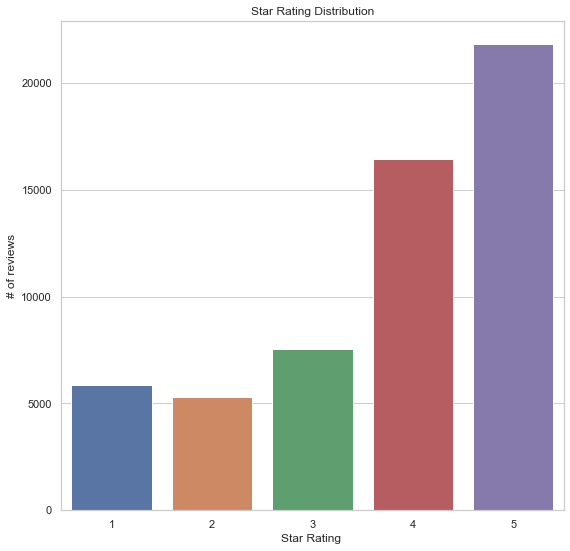

In [40]:
plt.figure(figsize=(9,9))
sns.countplot(x='stars', data=df)
plt.ylabel('# of reviews')
plt.xlabel('Star Rating ')
plt.title("Star Rating Distribution");

In [41]:
df['target'] = df['stars'].apply(lambda x: 1 if x >= 4 else 0)

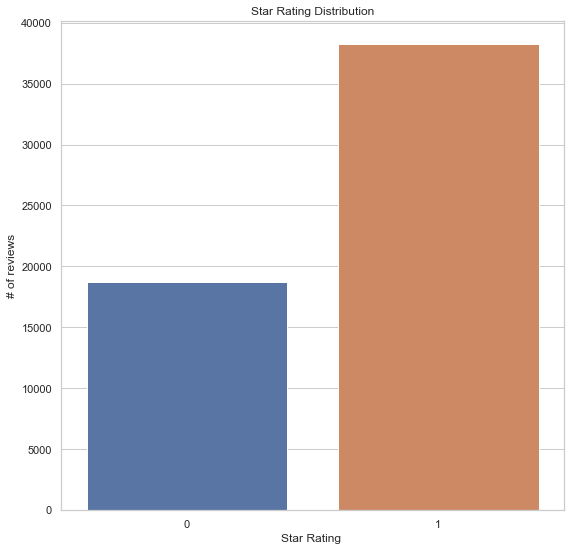

In [42]:
plt.figure(figsize=(9,9))
sns.countplot(x='target', data=df)
plt.ylabel('# of reviews')
plt.xlabel('Star Rating ')
plt.title("Star Rating Distribution");

In [43]:
combined_words = ''

for review in df.lem_join:
    combined_words += review + " "
    
wordcloud = WordCloud(width = 800, 
                      height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(combined_words)    

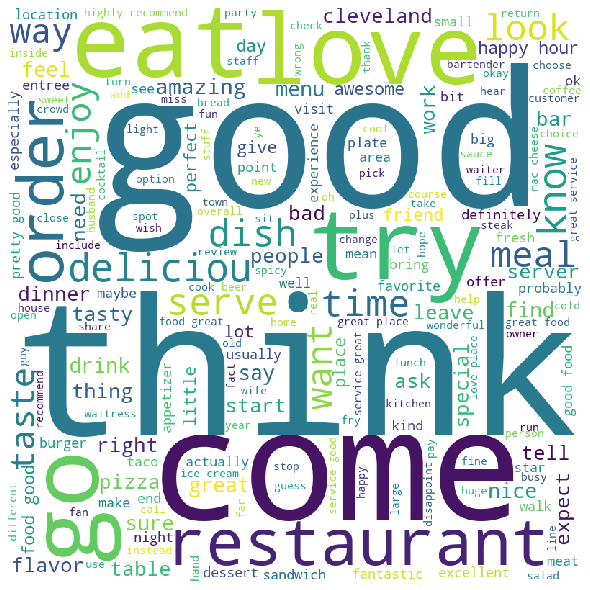

In [44]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

## Train-test split the data

In [45]:
# declare X & Y
Y = df['target']
X = df['lem_join']

# let's stratify the data so we get a fair balance
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)

## Prep BoW

In [46]:
def BoW_generator(text):
    
    # get the top 2000 words
    n_top_words = 2000
    count_vec = CountVectorizer(max_features=n_top_words)
    mask = count_vec.fit_transform(text)
    
    # create a dataframe
    word_counts = pd.DataFrame(
        mask.toarray().reshape(-1, n_top_words), 
        columns=count_vec.get_feature_names()
    )  
    
    return word_counts

In [47]:
# apply to X values
X_train_bow = BoW_generator(X_train)
X_test_bow = BoW_generator(X_test)

## Prep Tf-Idf

In [48]:
tfidf_vec = TfidfVectorizer(
    max_df=0.5, 
    min_df=2,
    stop_words='english', 
    lowercase=True,
    use_idf=True,
    norm=u'l2',
    smooth_idf=True
)

In [49]:
# applying to X values
X_train_tfidf=tfidf_vec.fit_transform(X_train)
X_test_tfidf=tfidf_vec.fit_transform(X_test)

# Phase 1: Sentiment Analysis of Yelp Reviews

In [50]:
def model_metrics(model, X, y):
    model_sum = {}
    
    # get cross validation score & mean of CV score
    cv_score = cross_val_score(model, X, y, cv=10, n_jobs=-1)
    
    model_sum['cv_scores'] = list(cv_score)
    model_sum['cv_mean'] = np.mean(cv_score)
    
    # get confusion matrix metrics
    y_pred = model.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    
    model_sum['true negatives'] = tn
    model_sum['false positives'] = fp
    model_sum['false negatives'] = fn
    model_sum['true positives'] = tp
    model_sum['accuracy'] = (tp+tn)/len(y_pred)
    model_sum['f1 score'] = 2*tp/(2*tp+fp+fn)
    model_sum['class_report'] = classification_report(y, y_pred)
    
    return model_sum

In [51]:
def format_metrics(model_sum):
    # print cross-validation scores
    print("Cross Validation Scores\n" + 23*"=" + "\n{}\n".format(model_sum['cv_scores']))
    print("Average CV = {}\n".format(model_sum['cv_mean']))
    
    # print classification report
    print("Classification Report\n" + 21*"=" + "\n" + model_sum['class_report'])
    
    # print confusion matrix results
    print("Confusion Matrix\n" + 16*"=" + '\nTrue Positives = {}\nTrue Negatives'\
          '= {}\nFalse Positives = {}\nFalse Negatives = {}'\
          .format(model_sum['true positives'], 
                  model_sum['true negatives'], 
                  model_sum['false positives'], 
                  model_sum['false negatives']))

## Logistic Regression

In [52]:
# set parameters
params = {
    'penalty': 'l2',
    'fit_intercept': True, 
    'max_iter': 50, 
    'n_jobs':-1, 
    'dual': False
}

In [53]:
lrm_model1 = LogisticRegression(**params)
lrm_model2 = LogisticRegression(**params)

# fit both models
lrm_model1.fit(X_train_bow, y_train)
lrm_model2.fit(X_train_tfidf, y_train)

# prep and display metrics
lrm_results_bow = model_metrics(lrm_model1, X_train_bow, y_train)
lrm_results_tfidf = model_metrics(lrm_model2, X_train_tfidf, y_train)

print('Logistic Regression Model (BoW)')
format_metrics(lrm_results_bow)

print('\n\nLogistic Regression Model (Tf-Idf)')
format_metrics(lrm_results_tfidf)

Logistic Regression Model (BoW)
Cross Validation Scores
[0.874443663621457, 0.8739751698289998, 0.869962511715089, 0.8669165885660731, 0.8795688847235239, 0.8716026241799437, 0.8755857544517338, 0.869962511715089, 0.8744142455482662, 0.8758200562324273]

Average CV = 0.8732252010582602

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     14017
           1       0.90      0.95      0.93     28665

    accuracy                           0.90     42682
   macro avg       0.89      0.87      0.88     42682
weighted avg       0.90      0.90      0.90     42682

Confusion Matrix
True Positives = 27162
True Negatives= 11149
False Positives = 2868
False Negatives = 1503


Logistic Regression Model (Tf-Idf)
Cross Validation Scores
[0.8812368236120871, 0.8817053174045444, 0.8865979381443299, 0.8734770384254921, 0.8884723523898782, 0.8765229615745079, 0.8819119025304593, 0.8816776007497656, 0.8844892221180881, 0.88659793814

## Naive Bayes Classification

In [54]:
# set parameters
params = {
}

In [55]:
clf_model1 = MultinomialNB(**params)
clf_model2 = MultinomialNB(**params)

# fit both models
clf_model1.fit(X_train_bow, y_train)
clf_model2.fit(X_train_tfidf, y_train)

# prep and display metrics
clf_results_bow = model_metrics(clf_model1, X_train_bow, y_train)
clf_results_tfidf = model_metrics(clf_model2, X_train_tfidf, y_train)

print('Naive Bayes Model (BoW)')
format_metrics(clf_results_bow)

print('\n\nNaive Bayes Model (Tf-Idf)')
format_metrics(clf_results_tfidf)

Naive Bayes Model (BoW)
Cross Validation Scores
[0.8578121339892246, 0.855703911923167, 0.862464854732896, 0.8479381443298969, 0.8612933458294283, 0.8528584817244611, 0.8570759137769447, 0.8474695407685099, 0.8608247422680413, 0.8603561387066542]

Average CV = 0.8563797208049223

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.75      0.78     14017
           1       0.88      0.92      0.90     28665

    accuracy                           0.86     42682
   macro avg       0.85      0.83      0.84     42682
weighted avg       0.86      0.86      0.86     42682

Confusion Matrix
True Positives = 26258
True Negatives= 10469
False Positives = 3548
False Negatives = 2407


Naive Bayes Model (Tf-Idf)
Cross Validation Scores
[0.838838135394706, 0.8329819629889904, 0.834817244611059, 0.8261480787253983, 0.834817244611059, 0.8270852858481724, 0.8266166822867854, 0.8263823805060918, 0.8345829428303655, 0.837863167760075]

Average CV 

## Linear Support Vector Classification

In [56]:
params = {
    'loss': 'log', 
    'penalty': 'l2', 
    'alpha': 1e-3, 
    'random_state': 42, 
    'max_iter': 5, 
    'tol': None
}

In [57]:
svc_model1 = SGDClassifier(**params)
svc_model2 = SGDClassifier(**params)

# fit both models
svc_model1.fit(X_train_bow, y_train)
svc_model2.fit(X_train_tfidf, y_train)

# prep and display metrics
svc_results_bow = model_metrics(svc_model1, X_train_bow, y_train)
svc_results_tfidf = model_metrics(svc_model2, X_train_tfidf, y_train)

print('Support Vector Classification Model (BoW)')
format_metrics(svc_results_bow)

print('\n\nSupport Vector Classification Model (Tf-Idf)')
format_metrics(svc_results_tfidf)

Support Vector Classification Model (BoW)
Cross Validation Scores
[0.8706957132817991, 0.8772546263762006, 0.8732427366447985, 0.8636363636363636, 0.8791002811621368, 0.8704311152764761, 0.8704311152764761, 0.8617619493908154, 0.8701968134957826, 0.8758200562324273]

Average CV = 0.8712570770773276

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.77      0.82     14017
           1       0.89      0.94      0.92     28665

    accuracy                           0.89     42682
   macro avg       0.88      0.86      0.87     42682
weighted avg       0.88      0.89      0.88     42682

Confusion Matrix
True Positives = 26958
True Negatives= 10833
False Positives = 3184
False Negatives = 1707


Support Vector Classification Model (Tf-Idf)
Cross Validation Scores
[0.7858983368470368, 0.7917545092527524, 0.796157450796626, 0.7830365510777882, 0.7888940955951266, 0.7902999062792877, 0.7849109653233365, 0.7865510777881912, 0.787019681

## BERT

# Summary of results

In [58]:
keys = ['cv_mean', 'accuracy', 'f1 score', 
        'true positives', 'true negatives', 
        'false positives', 'false negatives', ]

names = [
    'Logistic Regression Model (BoW)', 
    'Logistic Regression Model (Tf-Idf)', 
    'Naive Bayes Model (BoW)', 
    'Naive Bayes Model (Tf-Idf)', 
    'Support Vector Classification Model (BoW)', 
    'Support Vector Classification Model (Tf-Idf)'
]

models = [
    lrm_results_bow, lrm_results_tfidf, 
    clf_results_bow, clf_results_tfidf, 
    svc_results_bow, svc_results_tfidf, 
]
comb = {}

# combine them into one dictionary
for k in keys:
    comb[k] = tuple(comb[k] for comb in models)

# plot that dictionary into a dataframe
summary = pd.DataFrame.from_dict(comb)
summary.set_index(pd.Index(names))

,cv_mean,accuracy,f1 score,true positives,true negatives,false positives,false negatives
Logistic Regression Model (BoW),0.873225,0.897591,0.925530,27162,11149,2868,1503
Logistic Regression Model (Tf-Idf),0.882269,0.906752,0.932384,27441,11261,2756,1224
Naive Bayes Model (BoW),0.856380,0.860480,0.898155,26258,10469,3548,2407
Naive Bayes Model (Tf-Idf),0.832013,0.851670,0.898922,28152,8199,5818,513
Support Vector Classification Model (BoW),0.871257,0.885408,0.916830,26958,10833,3184,1707
Support Vector Classification Model (Tf-Idf),0.788412,0.792161,0.864868,28388,5423,8594,277


In [59]:
# print ROC curve for LRM BoW
preds = lrm_model1.predict_proba(X_train_bow)[:,1]
fpr_lrm_bow, tpr_lrm_bow, threshold = roc_curve(y_train, preds)
lrm_auc_bow = auc(fpr_lrm_bow, tpr_lrm_bow)

# print ROC curve for LRM tf-idf
preds = lrm_model2.predict_proba(X_train_tfidf)[:,1]
fpr_lrm_tfidf, tpr_lrm_tfidf, threshold = roc_curve(y_train, preds)
lrm_auc_tfidf = auc(fpr_lrm_tfidf, tpr_lrm_tfidf)

In [60]:
# print ROC curve for CLF BoW
preds = clf_model1.predict_proba(X_train_bow)[:,1]
fpr_clf_bow, tpr_clf_bow, threshold = roc_curve(y_train, preds)
clf_auc_bow = auc(fpr_clf_bow, tpr_clf_bow)

# print ROC curve for CLF tf-idf
preds = clf_model2.predict_proba(X_train_tfidf)[:,1]
fpr_clf_tfidf, tpr_clf_tfidf, threshold = roc_curve(y_train, preds)
clf_auc_tfidf = auc(fpr_clf_tfidf, tpr_clf_tfidf)

In [61]:
# print ROC curve for SVC BoW
preds = svc_model1.predict_proba(X_train_bow)[:,1]
fpr_svc_bow, tpr_svc_bow, threshold = roc_curve(y_train, preds)
svc_auc_bow = auc(fpr_svc_bow, tpr_svc_bow)

# print ROC curve for SVC tf-idf
preds = svc_model2.predict_proba(X_train_tfidf)[:,1]
fpr_svc_tfidf, tpr_svc_tfidf, threshold = roc_curve(y_train, preds)
svc_auc_tfidf = auc(fpr_svc_tfidf, tpr_svc_tfidf)

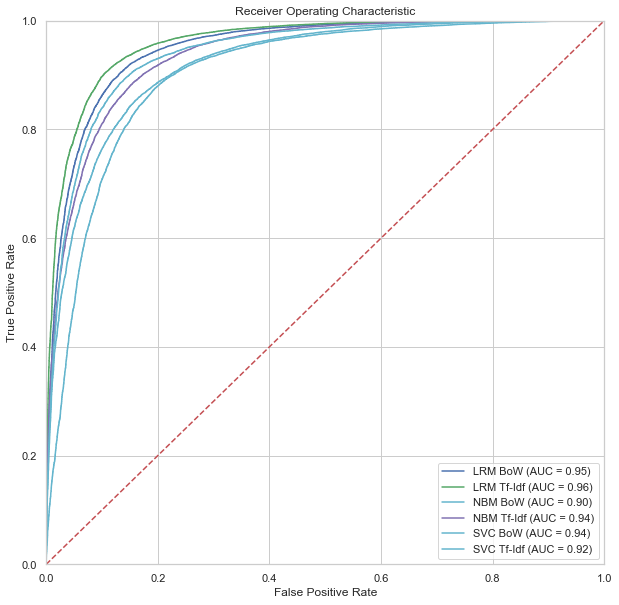

In [62]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')

# LRM Plots
plt.plot(fpr_lrm_bow, tpr_lrm_bow, 'b', 
         label = 'LRM BoW (AUC = %0.2f)' % lrm_auc_bow)
plt.plot(fpr_lrm_tfidf, tpr_lrm_tfidf, 'g', 
         label = 'LRM Tf-Idf (AUC = %0.2f)' % lrm_auc_tfidf)

# NBM Plots
plt.plot(fpr_clf_bow, tpr_clf_bow, 'c', 
         label = 'NBM BoW (AUC = %0.2f)' % clf_auc_bow)
plt.plot(fpr_clf_tfidf, tpr_clf_tfidf, 'm', 
         label = 'NBM Tf-Idf (AUC = %0.2f)' % clf_auc_tfidf)

# SVC Plots
plt.plot(fpr_svc_bow, tpr_svc_bow, 'c', 
         label = 'SVC BoW (AUC = %0.2f)' % svc_auc_bow)
plt.plot(fpr_svc_tfidf, tpr_svc_tfidf, 'c', 
         label = 'SVC Tf-Idf (AUC = %0.2f)' % svc_auc_tfidf)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Phase 2: Topic Extraction of Yelp Reviews

In [63]:
# linking words to topics
def word_topic(tfidf, solution, wordlist):
    
    # loading scores for each word on each topic/component.
    words_by_topic = tfidf.T * solution

    # linking the loadings to the words in an easy-to-read way.
    components=pd.DataFrame(words_by_topic,index=wordlist)
    
    return components

In [64]:
# extracts the top N words and their loadings for each topic.
def top_words(components, n_top_words):
    
    list_df = []
    
    # go through each component
    for column in range(components.shape[1]):
        # sort the column so that highest loadings are at the top.
        sortedwords = components.iloc[:,column].sort_values(ascending=False)
        
        # choose the N highest loadings.
        chosen = sortedwords[:n_top_words].to_frame()
        
        # format df
        chosen.rename(columns={column: 'Topic {}'.format(column)}, inplace=True)
        chosen = chosen.round(2) 
        
        # add to list of dataframes
        list_df.append(chosen)
        
    return list_df

In [65]:
# displays dataframes side by side for easy reading
def display_side_by_side(list_df):

    html_str = ' '
    
    for df in list_df:
        html_str+=df.to_html()
    
    mask = 'table style="display:inline"'
    
    display_html(html_str.replace('table', mask), raw=True)

## Divide the data and process it

In [66]:
neg_df = df[df.target == 0].lem_join
pos_df = df[df.target == 1].lem_join

In [67]:
tfidf_vec = TfidfVectorizer(
    max_df=0.5, 
    min_df=2,
    stop_words='english', 
    lowercase=True,
    use_idf=True,
    norm=u'l2',
    smooth_idf=True
)

neg_reviews = tfidf_vec.fit_transform(neg_df)
# getting the word list.
neg_terms = tfidf_vec.get_feature_names()

pos_reviews = tfidf_vec.fit_transform(pos_df)
# getting the word list.
pos_terms = tfidf_vec.get_feature_names()


In [68]:
# number of top words
n_top_words = 20

# number of topics.
ntopics = 5

In [69]:
svd = TruncatedSVD(
    n_components=ntopics, 
    n_iter=7,
    random_state=42
)

svd_normal = make_pipeline(svd, Normalizer(copy=False))
X_svd = svd_normal.fit_transform(neg_reviews)

components_svd = word_topic(neg_reviews, X_svd, neg_terms)

svd_results = top_words(components_svd, n_top_words)

In [70]:
print('SVD Top Words\n')
display_side_by_side(svd_results)

SVD Top Words



,Topic 0
good,565.22
order,515.57
place,507.91
service,426.20
time,405.20
like,402.95
come,402.47
great,318.82
drink,314.80
restaurant,304.56


In [71]:
nmf = NMF(
    alpha=0.0, 
    init='nndsvdar',
    l1_ratio=0.0, 
    max_iter=200, 
    n_components=ntopics, 
    random_state=0, 
    solver='cd', 
    tol=0.0001, 
    verbose=0 
)

X_nmf = nmf.fit_transform(neg_reviews) 

components_nmf = word_topic(neg_reviews, X_nmf, neg_terms)

nmf_results = top_words(components_nmf, n_top_words)

In [72]:
print('NMF Top Words\n')
display_side_by_side(nmf_results)

NMF Top Words



,Topic 0
good,19.90
place,17.66
service,13.66
great,11.06
like,10.29
time,10.18
restaurant,8.16
order,8.13
price,8.10
come,7.81
